In [1]:
#Ref: https://github.com/hkaneko1985/python_data_analysis_ohmsha/blob/master/sample_program_3_5.py
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE  # scikit-learn の中の t-SNE を実行するためのライブラリのインポート

In [2]:
df = pd.read_csv("train.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,days,weeks
0,31,7,1,1,0,12294,1,0,0,21,11,101,3,498,0,1,0,326.0,47.0
1,29,2,2,2,0,43027,0,0,0,22,8,158,2,702,0,3,1,236.0,34.0
2,35,4,1,2,0,12252,1,0,0,11,11,351,1,826,0,0,0,316.0,45.0
3,31,9,1,1,0,99121,1,1,2,16,5,658,2,120,0,0,0,138.0,20.0
4,48,10,1,0,0,42005,1,0,1,3,4,177,1,273,0,3,0,94.0,13.0


In [3]:
scaled_df = (df - df.mean()) / df.std()  # オートスケーリング
scaled_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,days,weeks
0,-0.649055,0.824967,-0.303252,-0.293850,-0.019213,-1.118106,0.844455,-0.381868,-0.629291,0.496224,2.338103,-0.626161,1.288539,0.259835,-0.234277,-1.711150,-0.290719,2.403272,2.443126
1,-0.904927,-0.696243,1.458403,1.136861,-0.019213,-0.147102,-1.184153,-0.381868,-0.629291,0.612916,0.934703,-0.348031,0.235957,1.068875,-0.234277,0.399602,3.439622,1.023347,1.051577
2,-0.137312,-0.087759,-0.303252,1.136861,-0.019213,-1.119433,0.844455,-0.381868,-0.629291,-0.670693,2.338103,0.593709,-0.816625,1.560645,-0.234277,-2.766525,-0.290719,2.249947,2.229042
3,-0.649055,1.433451,-0.303252,-0.293850,-0.019213,1.625177,0.844455,2.618606,1.674963,-0.087235,-0.468698,2.091708,0.235957,-1.239269,-0.234277,-2.766525,-0.290719,-0.479238,-0.447014
4,1.525855,1.737693,-0.303252,-1.724562,-0.019213,-0.179392,0.844455,-0.381868,0.522836,-1.604227,-0.936498,-0.255321,-0.816625,-0.632489,-0.234277,0.399602,-0.290719,-1.153868,-1.196309


In [5]:
perplexity = 30  # perplexity (基本的には 5 から 50 の間)

In [6]:
# t-SNE
t = TSNE(perplexity=perplexity, n_components=2, init='pca', random_state=0).fit_transform(scaled_df)
t = pd.DataFrame(t, index=df.index, columns=['t_1', 't_2'])  # pandas の DataFrame 型に変換。行の名前・列の名前も設定
t.to_csv('tsne_t.csv')  # csv ファイルに保存。同じ名前のファイルがあるときは上書きされるため注意

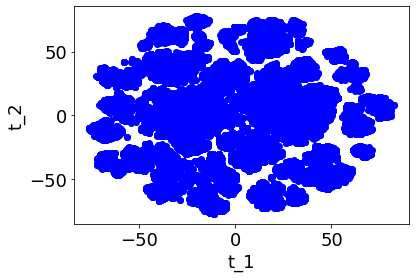

In [7]:
# t1 と t2 の散布図
plt.rcParams['font.size'] = 18
plt.scatter(t.iloc[:, 0], t.iloc[:, 1], c='blue')
plt.xlabel('t_1')
plt.ylabel('t_2')
plt.show()